Multiple logistic regression 
(0) 데이터 불러오기 및 mpg와 나머지 것 상관관계 살펴보기

In [5]:
import pandas
import seaborn
seaborn.set()
from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp6data3'
urlretrieve(URL, 'auto_mpg.csv')
mpg_data = pandas.read_csv('/content/auto_mpg.csv')
mpg_data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
mpg_data.info()
y_col='mpg'
x_cols=mpg_data.columns.drop(['car name','origin','mpg'])
print(x_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.7+ KB
Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year'],
      dtype='object')


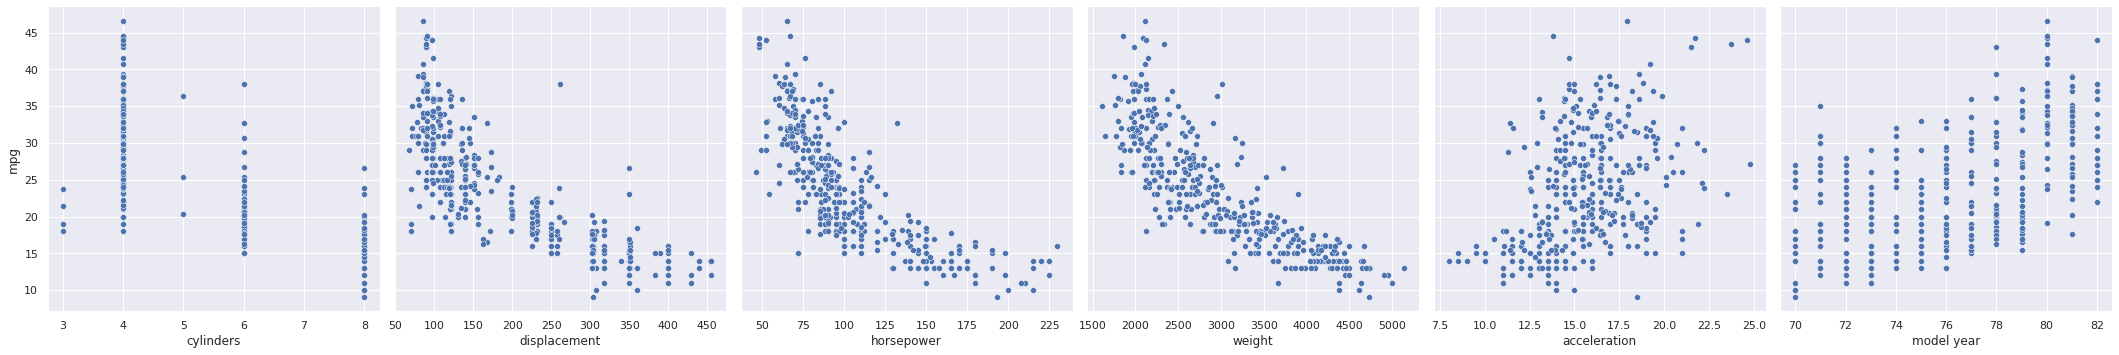

In [7]:
seaborn.pairplot(data=mpg_data, height=5, aspect=1, 
                 x_vars=x_cols, y_vars=y_col);

In [ ]:
(1)코드로 linear model matrix format 만들기

In [ ]:
from autograd import numpy
from autograd import grad

X=mpg_data[x_cols].values 
print(X)
X=numpy.hstack((numpy.ones((X.shape[0],1)),X))
y=mpg_data[y_col].values 

print("X.shape = {}, y.shape = {}".format(X.shape, y.shape))

In [15]:
def linear_regression(params, X):
    return numpy.dot(X, params)

def cost_function(params, model, X, y): #paramer=가중치, X=input value y=예측(결과) 값
    y_pred = model(params, X)
    return numpy.mean( numpy.sum((y-y_pred)**2) ) #Q,mean은 왜 붙이는 거임?

[2] gradient descent로 가중치값 찾기 (X scaling X)
--> loss가 지나치게 커져서 error가 날 수 밖에 없다. 

In [17]:
gradient = grad(cost_function)
gradient(numpy.random.rand(X.shape[1]), linear_regression, X ,y)

array([6.96017763e+05, 4.13732746e+06, 1.56330794e+08, 7.99372308e+07,
       2.25137579e+09, 1.05537339e+07, 5.26247597e+07])

In [ ]:
max_iter=30
alpha= 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
  descent = gradient(params, linear_regression, X,y)
  params = params-descent*alpha
  loss= cost_function(params, linear_regression,X,y)
  if i %5 == 0:
    print('iteration {}, loss={}'.format(i,loss))

[1.5] Feature scaling
x'=(x-min(x))/(max(x)-min(x))

In [19]:
mpg_data[x_cols].describe().loc[['max','min']]

,cylinders,displacement,horsepower,weight,acceleration,model year
max,8.0,455.0,230.0,5140.0,24.8,82.0
min,3.0,68.0,46.0,1613.0,8.0,70.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

min_max_scaler=MinMaxScaler()
X_scaled=min_max_scaler.fit_transform(mpg_data[x_cols])
X_scaled=numpy.hstack((numpy.ones((X_scaled.shape[0],1)),X_scaled))
pd.DataFrame(X_scaled).describe().loc[['max','min']]

In [ ]:
max_iter= 1000
alpha = 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
  descent=gradient(params, linear_regression, X_scaled, y)
  params=params-descent*alpha
  loss = cost_function(params, linear_regression, X_scaled, y)
  if i%100 ==0:
    print('iteration{}, loss={}'.format(i,loss))

In [ ]:
params

In [24]:
y_pred_gd= X_scaled @ params

[1.6] 얼마나 정확한가?

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y,y_pred_gd)
rmse = mean_squared_error(y, y_pred_gd, squared=False)
print('mae={}'.format(mae))
print('rmse={}'.format(rmse))


mae=2.613991601156043
rmse=3.40552056741184


2. 날씨 예제에 multiple logistic regression 적용하기

1)우선 데이터 불러오기

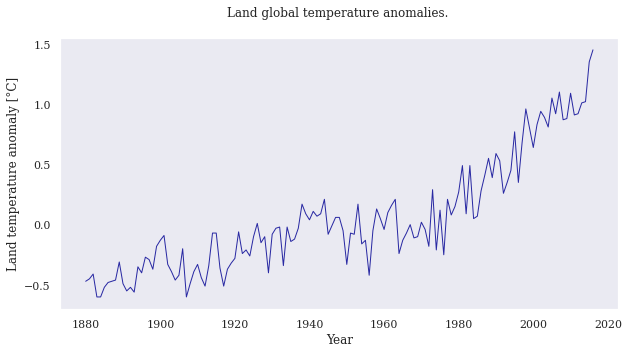

In [27]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

import numpy
import sympy

fname = '/content/land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = numpy.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

from matplotlib import pyplot
%matplotlib inline

pyplot.rc('font', family='serif', size='18')

#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1) 
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

In [28]:
#cost function
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2
grad_b = sympy.lambdify([w,b,x,y],cost_function.diff(b),'numpy')
grad_w = sympy.lambdify([w,b,x,y],cost_function.diff(w),'numpy')

w = 0
b = 0 

for i in range(1000):
  descent_b = numpy.sum(grad_b(w,b,year,temp_anomaly))/len(year)
  descent_w = numpy.sum(grad_w(w,b,year,temp_anomaly))/len(year)
  w = w - descent_w*0.001
  b = b - descent_b*0.001
print(w)
print(b)

nan
nan


<string>:2: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [ ]:
#normalization
year_scaled=(year-year.mean())/year.std()
temp_anomaly_scaled=(temp_anomaly-temp_anomaly.mean()) / temp_anomaly.std()

w, b = 0, 0
for i in range(1000):
  descent_b=numpy.sum(grad_b(w,b,year_scaled,temp_anomaly_scaled))/len(year_scaled)
  descent_w=numpy.sum(grad_w(w,b,year_scaled,temp_anomaly_scaled))/len(year_scaled)
  w= w-descent_w*0.001
  b = b - descent_b*0.001
print(w)
print(b)

In [ ]:
reg = b + w*year_scaled
pyplot.figure(figsize=(10, 5))

pyplot.plot(year_scaled, temp_anomaly_scaled, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year_scaled, reg, 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();